##Supervised Learning Regression Problem

###About
Online property companies offer valuations of houses using machine learning techniques. The aim of this notebook is to predict the house sales in King County, Washington State, USA). The dataset consisted of historic data of houses sold between *May 2014 to May 2015*. The dataset consisted of 21 variables and 21613 observations

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', 
        palette='muted', 
        font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

import warnings
warnings.filterwarnings('ignore')

In [2]:
DIR_DATA = '../content/data/'
DIR_MODELS = '../content/pickled_models'

In [3]:
!wget https://raw.githubusercontent.com/dbendet/coursera_machine_learning/master/kc_house_data.csv

--2021-01-03 10:25:48--  https://raw.githubusercontent.com/dbendet/coursera_machine_learning/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.1s    

2021-01-03 10:25:48 (19.4 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [4]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Working on copy
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Convert data col to datetime type
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x[:8]))

# Compute transaction age as # of days between the transaction date and the
# date of the most recent transaction in the dataframe
df['trx_age'] = (df.date.max() - df.date).apply(lambda x: x.days)

In [8]:
# Preview if numeric Dtype are actually binanries OR have multiple unique values
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
trx_age            372
dtype: int64

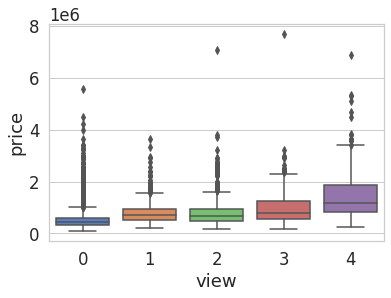

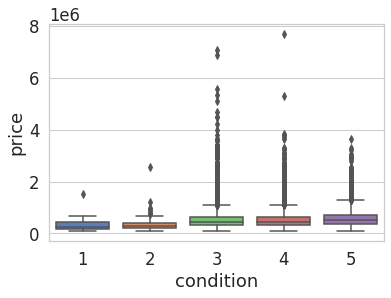

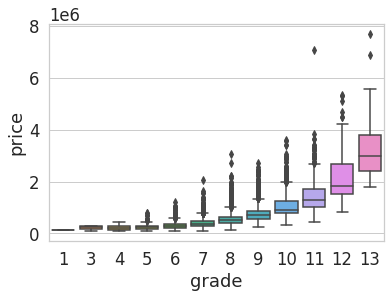

In [9]:
# Preview if cols; "view", "condition", "grade" are nominal or at least ordinal
# if they are at least ordinal, then we should see a monotonic relationship with "price"
# We can see a monotonic relationship, so at least ordinal...
for col in ['view', 'condition', 'grade']:
    sns.boxplot(data=df, x=col, y="price")
    plt.show()

##Data prepocessing 

In [10]:
# Define X and y cols, excluding the following variables for simplicity
X_cols = [col for col in df.columns if col not in [
    "price", 
    "date", 
    "id", 
    "zipcode", 
    "lat", 
    "long"
]]

y_col = ["price"]

X, y = df[X_cols], df[y_col]

In [11]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'trx_age'],
      dtype='object')

##Pycaret

In [ ]:
!pip install pycaret

In [13]:
# Check pycaret version
import pycaret
print('PyCaret: %s' % pycaret.__version__)

PyCaret: 2.2.0


Display interactive visuals

In [14]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


Regression is a technique used to model and analyse the relationships between variables and often times how they contribute and are related to producing a particular outcome together

The OUTPUT variable is a REAL VALUE!

In [15]:
from pycaret.regression import *

In [16]:
# Initialize training environment and create the transformation pipeline
reg_exp = setup(
    data=df[X_cols + y_col],
    target='price',
    session_id=123,
    numeric_features=X_cols
)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(21613, 17)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15129, 16)"


In [17]:
# Top model is catboost
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,113746.2711,3.311171e+10,180986.7345,0.7541,0.2792,0.2346,5.411
lightgbm,Light Gradient Boosting Machine,116612.1219,3.429450e+10,184511.4635,0.7437,0.2834,0.2408,0.249
rf,Random Forest Regressor,115272.4961,3.427798e+10,184711.0620,0.7428,0.2816,0.2363,8.339
et,Extra Trees Regressor,115478.3472,3.484987e+10,186136.6218,0.7391,0.2837,0.2378,4.115
gbr,Gradient Boosting Regressor,121475.2257,3.556953e+10,188237.1549,0.7325,0.2939,0.2534,2.035
xgboost,Extreme Gradient Boosting,117637.4789,3.613030e+10,189115.4391,0.7308,0.2863,0.2395,3.494
llar,Lasso Least Angle Regression,139839.3965,4.735331e+10,217092.3879,0.6443,0.3751,0.2921,0.021
br,Bayesian Ridge,139880.1950,4.735985e+10,217104.6832,0.6443,0.3749,0.2922,0.026
lar,Least Angle Regression,139874.5646,4.735488e+10,217098.0922,0.6443,0.3749,0.2922,0.023
ridge,Ridge Regression,139878.2516,4.735540e+10,217096.6594,0.6443,0.3749,0.2922,0.019


In [18]:
# Initializing catboost model
cboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,109174.0874,2.860285e+10,169123.7785,0.7788,0.2731,0.2298
1,120137.1166,4.248464e+10,206118.0328,0.7112,0.2897,0.2420
2,114588.0355,3.043220e+10,174448.2598,0.7492,0.2923,0.2497
3,119750.2823,4.788631e+10,218829.4006,0.7430,0.2775,0.2339
4,107534.1878,2.425803e+10,155749.8838,0.7522,0.2772,0.2350
5,115646.5660,3.409753e+10,184655.1686,0.7745,0.2790,0.2324
6,110615.9453,2.703761e+10,164431.1788,0.7900,0.2773,0.2323
7,114808.5326,2.815739e+10,167801.6424,0.7532,0.2806,0.2353
8,113747.2556,3.764554e+10,194024.5790,0.7407,0.2740,0.2268
9,111460.7023,3.051500e+10,174685.4209,0.7485,0.2716,0.2283


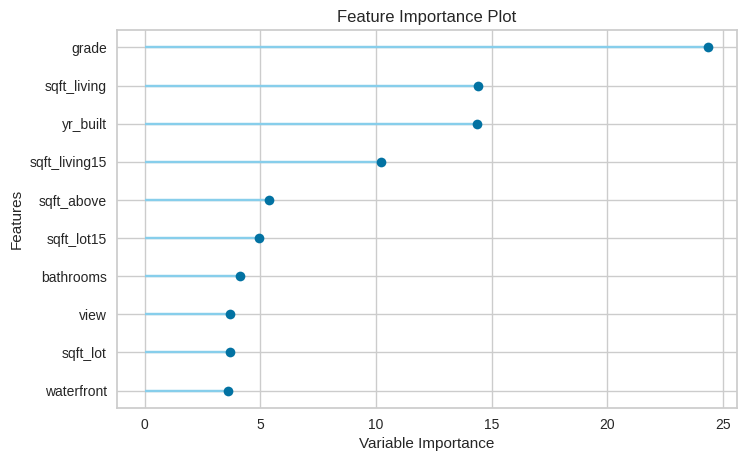

In [19]:
plot_model(cboost, plot='feature')

In [20]:
# Predictions are performed on 30% holdout set
# using trained model
predict_model(cboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,113065.2424,3.037116e+10,174273.2478,0.7764,0.2814,0.2372


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,trx_age,price,Label
0,4.0,2.50,2490.0,8750.0,2.0,0.0,0.0,3.0,8.0,2040.0,450.0,1976.0,0.0,2120.0,10240.0,294.0,532500.0,5.251542e+05
1,2.0,1.00,1480.0,4080.0,1.0,0.0,0.0,3.0,7.0,1050.0,430.0,1949.0,0.0,1310.0,4080.0,282.0,410000.0,4.578065e+05
2,3.0,2.50,3750.0,7821.0,2.0,0.0,0.0,3.0,9.0,3750.0,0.0,2001.0,0.0,3210.0,8405.0,33.0,782500.0,7.837653e+05
3,4.0,3.25,3530.0,20012.0,2.0,0.0,0.0,3.0,11.0,3530.0,0.0,1986.0,0.0,3850.0,20707.0,35.0,995000.0,1.281320e+06
4,4.0,2.50,2009.0,4800.0,2.0,0.0,0.0,3.0,8.0,2009.0,0.0,2012.0,0.0,1798.0,4800.0,169.0,279000.0,4.144978e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,3.0,1.50,1510.0,16800.0,1.0,0.0,0.0,5.0,8.0,1510.0,0.0,1956.0,0.0,1560.0,7276.0,48.0,415000.0,5.001611e+05
6480,3.0,1.75,1880.0,10032.0,1.0,0.0,0.0,4.0,8.0,1880.0,0.0,1984.0,0.0,2430.0,9732.0,324.0,681000.0,4.988328e+05
6481,4.0,3.00,3090.0,35074.0,2.0,0.0,0.0,3.0,9.0,3090.0,0.0,1978.0,0.0,3120.0,35150.0,142.0,855000.0,7.139080e+05
6482,4.0,1.75,2000.0,4000.0,1.5,0.0,0.0,5.0,7.0,1450.0,550.0,1926.0,0.0,1430.0,4000.0,383.0,536500.0,6.081738e+05


###Catboost Vs Linear regression

In [21]:
# A linear regression model Vs catboost model
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,145006.1562,4.800631e+10,219103.4219,0.6287,0.3866,0.3097
1,144936.2188,5.414221e+10,232684.7812,0.6320,0.3787,0.2940
2,136449.1094,4.477182e+10,211593.5312,0.6310,0.3901,0.2966
3,146651.6875,6.303570e+10,251069.1250,0.6617,0.3809,0.2965
4,134793.0781,3.780595e+10,194437.5312,0.6138,0.3729,0.2958
5,137395.7031,4.680403e+10,216342.3750,0.6904,0.3702,0.2832
6,135670.3594,4.065647e+10,201634.5000,0.6842,0.3733,0.2861
7,142728.3906,4.556851e+10,213467.8125,0.6006,0.3718,0.2957
8,138449.6406,4.807204e+10,219253.3594,0.6688,0.3629,0.2831
9,136651.9844,4.467401e+10,211362.2656,0.6318,0.3618,0.2813


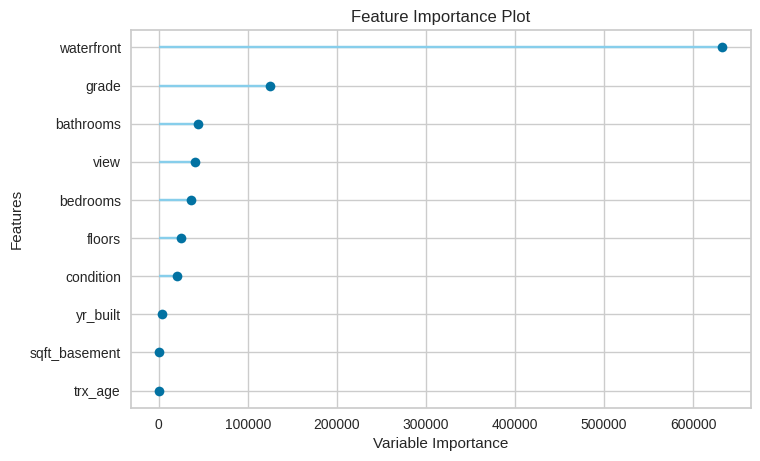

In [22]:
plot_model(lr, plot='feature')

In [23]:
# Predict using trained model
predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,140060.1875,4.563906e+10,213633.0,0.6639,0.3932,0.2942


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,trx_age,price,Label
0,4.0,2.50,2490.0,8750.0,2.0,0.0,0.0,3.0,8.0,2040.0,450.0,1976.0,0.0,2120.0,10240.0,294.0,532500.0,610254.5
1,2.0,1.00,1480.0,4080.0,1.0,0.0,0.0,3.0,7.0,1050.0,430.0,1949.0,0.0,1310.0,4080.0,282.0,410000.0,392408.0
2,3.0,2.50,3750.0,7821.0,2.0,0.0,0.0,3.0,9.0,3750.0,0.0,2001.0,0.0,3210.0,8405.0,33.0,782500.0,927682.0
3,4.0,3.25,3530.0,20012.0,2.0,0.0,0.0,3.0,11.0,3530.0,0.0,1986.0,0.0,3850.0,20707.0,35.0,995000.0,1201821.5
4,4.0,2.50,2009.0,4800.0,2.0,0.0,0.0,3.0,8.0,2009.0,0.0,2012.0,0.0,1798.0,4800.0,169.0,279000.0,409161.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,3.0,1.50,1510.0,16800.0,1.0,0.0,0.0,5.0,8.0,1510.0,0.0,1956.0,0.0,1560.0,7276.0,48.0,415000.0,548670.0
6480,3.0,1.75,1880.0,10032.0,1.0,0.0,0.0,4.0,8.0,1880.0,0.0,1984.0,0.0,2430.0,9732.0,324.0,681000.0,486691.0
6481,4.0,3.00,3090.0,35074.0,2.0,0.0,0.0,3.0,9.0,3090.0,0.0,1978.0,0.0,3120.0,35150.0,142.0,855000.0,865720.5
6482,4.0,1.75,2000.0,4000.0,1.5,0.0,0.0,5.0,7.0,1450.0,550.0,1926.0,0.0,1430.0,4000.0,383.0,536500.0,565854.0


In [24]:
# Monotone cols are AREA cols; "view", "grade", and "condition"
# i.e. as they increase they should lead to an increase price
monotone_cols = [col for col in X.columns if "sqft" in col] + ['view', 'grade', 'condition']

monotone_constraints = [1 if col in monotone_cols else 0 for col in X.columns]

cboost_constrained = tune_model(cboost, custom_grid={
    'monotone_constraints': [monotone_constraints]}, n_iter=1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,117266.0852,3.206084e+10,179055.4084,0.7520,0.2909,0.2482
1,127112.5117,4.678758e+10,216304.3751,0.6820,0.2992,0.2549
2,120591.8989,3.379130e+10,183824.1048,0.7215,0.3013,0.2604
3,126688.5054,5.287626e+10,229948.3861,0.7162,0.2888,0.2457
4,113080.4847,2.641144e+10,162515.9602,0.7302,0.2875,0.2458
5,122116.4664,3.485673e+10,186699.5665,0.7695,0.2899,0.2458
6,117189.0220,3.046132e+10,174531.7153,0.7634,0.2878,0.2439
7,121505.2161,3.125837e+10,176800.3764,0.7260,0.2946,0.2505
8,120387.0142,3.885991e+10,197129.1601,0.7323,0.2858,0.2405
9,119065.3867,3.278414e+10,181063.9052,0.7298,0.2866,0.2445


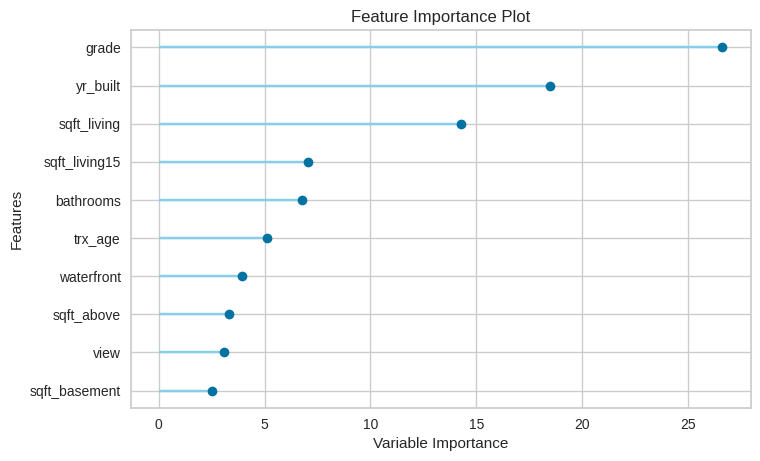

In [25]:
plot_model(cboost_constrained, plot='feature')

In [26]:
# Predict using trained model
predict_model(cboost_constrained)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,120807.2578,3.433747e+10,185303.7131,0.7471,0.2953,0.2515


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,trx_age,price,Label
0,4.0,2.50,2490.0,8750.0,2.0,0.0,0.0,3.0,8.0,2040.0,450.0,1976.0,0.0,2120.0,10240.0,294.0,532500.0,5.220283e+05
1,2.0,1.00,1480.0,4080.0,1.0,0.0,0.0,3.0,7.0,1050.0,430.0,1949.0,0.0,1310.0,4080.0,282.0,410000.0,3.879648e+05
2,3.0,2.50,3750.0,7821.0,2.0,0.0,0.0,3.0,9.0,3750.0,0.0,2001.0,0.0,3210.0,8405.0,33.0,782500.0,7.783373e+05
3,4.0,3.25,3530.0,20012.0,2.0,0.0,0.0,3.0,11.0,3530.0,0.0,1986.0,0.0,3850.0,20707.0,35.0,995000.0,1.102559e+06
4,4.0,2.50,2009.0,4800.0,2.0,0.0,0.0,3.0,8.0,2009.0,0.0,2012.0,0.0,1798.0,4800.0,169.0,279000.0,3.918173e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,3.0,1.50,1510.0,16800.0,1.0,0.0,0.0,5.0,8.0,1510.0,0.0,1956.0,0.0,1560.0,7276.0,48.0,415000.0,5.158286e+05
6480,3.0,1.75,1880.0,10032.0,1.0,0.0,0.0,4.0,8.0,1880.0,0.0,1984.0,0.0,2430.0,9732.0,324.0,681000.0,4.620963e+05
6481,4.0,3.00,3090.0,35074.0,2.0,0.0,0.0,3.0,9.0,3090.0,0.0,1978.0,0.0,3120.0,35150.0,142.0,855000.0,7.444149e+05
6482,4.0,1.75,2000.0,4000.0,1.5,0.0,0.0,5.0,7.0,1450.0,550.0,1926.0,0.0,1430.0,4000.0,383.0,536500.0,5.638836e+05


In [27]:
lr_pos = create_model('lasso')
lr_pos = tune_model(
    lr_pos,
    custom_grid={'positive': [True],
                 'alpha': [0]},
                 n_iter=1
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,156741.4844,5.390515e+10,232174.8281,0.5831,0.4761,0.3373
1,155033.7031,5.956015e+10,244049.4844,0.5952,0.4242,0.3179
2,147192.3438,5.076876e+10,225319.2500,0.5815,0.4179,0.3231
3,159382.8125,7.219273e+10,268687.0312,0.6126,0.3958,0.3269
4,145685.9688,4.236232e+10,205821.0781,0.5672,0.4298,0.3240
5,153877.6406,5.443779e+10,233319.0625,0.6400,0.3976,0.3209
6,147544.5312,4.731560e+10,217521.4844,0.6325,0.4359,0.3126
7,156173.9531,5.298255e+10,230179.3906,0.5356,0.4462,0.3300
8,150054.0938,5.496967e+10,234456.1094,0.6213,0.4527,0.3106
9,153113.3438,5.145930e+10,226846.4219,0.5759,0.4341,0.3198


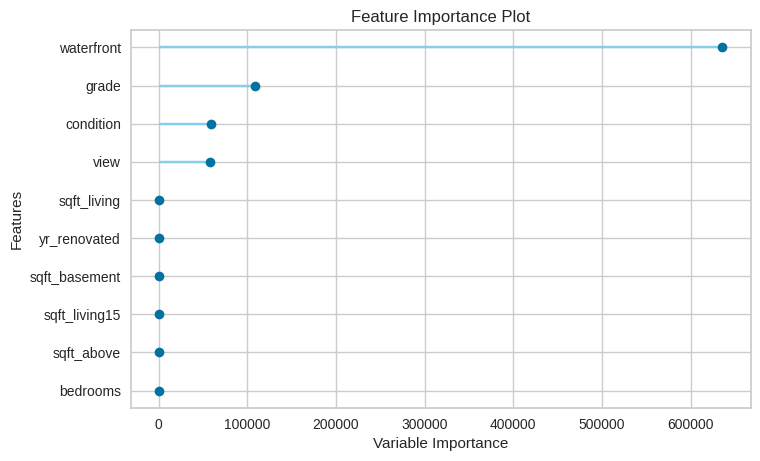

In [28]:
plot_model(lr_pos, plot='feature')

In [29]:
# Predict using trained model
predict_model(lr_pos)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,151321.65625,5.204060e+10,228124.078125,0.6168,0.4236,0.3214


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,trx_age,price,Label
0,4.0,2.50,2490.0,8750.0,2.0,0.0,0.0,3.0,8.0,2040.0,450.0,1976.0,0.0,2120.0,10240.0,294.0,532500.0,594084.750
1,2.0,1.00,1480.0,4080.0,1.0,0.0,0.0,3.0,7.0,1050.0,430.0,1949.0,0.0,1310.0,4080.0,282.0,410000.0,331451.875
2,3.0,2.50,3750.0,7821.0,2.0,0.0,0.0,3.0,9.0,3750.0,0.0,2001.0,0.0,3210.0,8405.0,33.0,782500.0,881465.000
3,4.0,3.25,3530.0,20012.0,2.0,0.0,0.0,3.0,11.0,3530.0,0.0,1986.0,0.0,3850.0,20707.0,35.0,995000.0,1076490.250
4,4.0,2.50,2009.0,4800.0,2.0,0.0,0.0,3.0,8.0,2009.0,0.0,2012.0,0.0,1798.0,4800.0,169.0,279000.0,507831.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,3.0,1.50,1510.0,16800.0,1.0,0.0,0.0,5.0,8.0,1510.0,0.0,1956.0,0.0,1560.0,7276.0,48.0,415000.0,551709.750
6480,3.0,1.75,1880.0,10032.0,1.0,0.0,0.0,4.0,8.0,1880.0,0.0,1984.0,0.0,2430.0,9732.0,324.0,681000.0,557993.250
6481,4.0,3.00,3090.0,35074.0,2.0,0.0,0.0,3.0,9.0,3090.0,0.0,1978.0,0.0,3120.0,35150.0,142.0,855000.0,787522.250
6482,4.0,1.75,2000.0,4000.0,1.5,0.0,0.0,5.0,7.0,1450.0,550.0,1926.0,0.0,1430.0,4000.0,383.0,536500.0,527386.250


In [30]:
# Retrain-model on the entire df including holdout set
lr = finalize_model(lr)
cboost = finalize_model(cboost)
cboost_constrained = finalize_model(cboost_constrained)
lr_pos = finalize_model(lr_pos)

In [31]:
models = {'lr': lr,
          'cboost': cboost, 
          'cboost_constrained': cboost_constrained, 
          'lr_pos': lr_pos, 
         }

for model_name, model in models.items():
    save_model(model, DIR_MODELS + model_name)

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


In [32]:
# Load pickled pipelines
lr = load_model(DIR_MODELS + 'lr')
cboost = load_model(DIR_MODELS + 'cboost')
cboost_constrained = load_model(DIR_MODELS + 'cboost_constrained')
lr_pos = load_model(DIR_MODELS + 'lr_pos')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [33]:
# New set-up for more optimized non-negative linear regression model
reg_exp = setup(
    data=df[X_cols + y_col], 
    target='price', 
    session_id=123, 
    numeric_features=X_cols,
    bin_numeric_features=['trx_age', 'yr_built', 'yr_renovated'],
    feature_interaction=True,
    interaction_threshold=0.5,
    polynomial_features=True,
    polynomial_degree=2,
    polynomial_threshold=0.5,
    remove_multicollinearity=True,
    feature_selection=True,
    feature_selection_threshold=0.5,
    normalize=True,
    normalize_method='minmax'
)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(21613, 17)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15129, 2710)"


In [34]:
lr_opt = create_model('lasso')
lr_opt = tune_model(
    lr_opt, 
    custom_grid={'positive': [True], 
                 'alpha': [0]}, 
                 n_iter=1
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,125569.8750,3.558771e+10,188647.0469,0.7248,0.3220,0.2682
1,137297.1875,4.446641e+10,210870.5938,0.6978,0.3692,0.2831
2,126712.8281,3.926328e+10,198149.6406,0.6764,0.3236,0.2756
3,130962.1875,4.206919e+10,205107.7656,0.7742,0.3405,0.2657
4,122153.9219,3.208830e+10,179132.0625,0.6722,0.3147,0.2680
5,128120.3438,3.695419e+10,192234.7188,0.7556,0.3152,0.2616
6,123184.4141,3.932861e+10,198314.4219,0.6946,0.3101,0.2575
7,131049.8906,3.778295e+10,194378.3594,0.6688,0.3276,0.2750
8,130866.6953,4.273360e+10,206721.0781,0.7056,0.3245,0.2695
9,127818.0547,4.187887e+10,204643.2812,0.6548,0.3311,0.2642


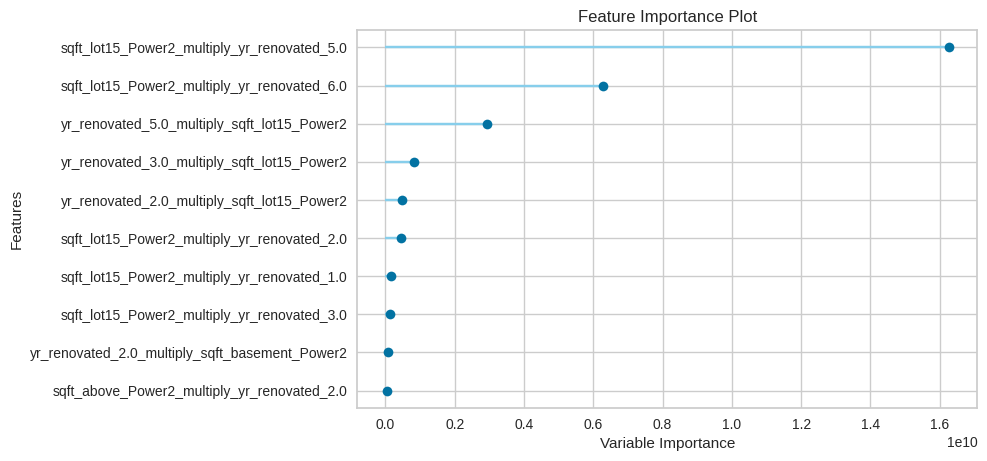

In [35]:
plot_model(lr_opt, plot='feature')

In [36]:
# Predict using trained model
predict_model(lr_opt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,127827.351562,3.679918e+10,191831.125,0.729,0.3228,0.2683


,yr_renovated_2.0,trx_age_8.0,yr_built_10.0,trx_age_10.0,yr_built_9.0,yr_renovated_4.0,trx_age_0.0,waterfront,condition,yr_built_0.0,yr_renovated_11.0,view_Power2,sqft_above_Power2,yr_renovated_6.0,grade_Power2,bathrooms_Power2,sqft_basement,yr_built_8.0,trx_age_1.0,yr_built_4.0,yr_built_7.0,yr_renovated_5.0,sqft_living15_Power2,trx_age_11.0,trx_age_6.0,yr_built_6.0,trx_age_13.0,yr_renovated_7.0,yr_built_11.0,yr_renovated_8.0,yr_built_14.0,yr_renovated_9.0,yr_built_13.0,sqft_lot15,trx_age_12.0,yr_built_2.0,yr_renovated_10.0,sqft_living_Power2,trx_age_7.0,sqft_lot,...,yr_built_4.0_multiply_trx_age_0.0,bathrooms_Power2_multiply_bedrooms,yr_renovated_13.0_multiply_yr_built_Power2,trx_age_5.0_multiply_trx_age_Power2,yr_built_5.0_multiply_sqft_lot15_Power2,grade_Power2_multiply_yr_built_12.0,trx_age_Power2_multiply_trx_age_9.0,yr_renovated_3.0_multiply_sqft_lot15,yr_renovated_8.0_multiply_condition,yr_built_8.0_multiply_trx_age_7.0,yr_built_10.0_multiply_view_Power2,yr_built_1.0_multiply_yr_renovated_11.0,yr_built_9.0_multiply_trx_age_6.0,sqft_living_Power2_multiply_yr_built_2.0,yr_built_7.0_multiply_bathrooms_Power2,sqft_above_Power2_multiply_yr_renovated_10.0,view_Power2_multiply_trx_age_14.0,yr_renovated_4.0_multiply_bedrooms,yr_renovated_7.0_multiply_trx_age_12.0,trx_age_10.0_multiply_yr_built_6.0,yr_built_1.0_multiply_yr_renovated_3.0,condition_multiply_trx_age_2.0,condition_multiply_yr_built_11.0,grade_Power2_multiply_bathrooms_Power2,yr_built_10.0_multiply_sqft_living15_Power2,trx_age_14.0_multiply_yr_built_Power2,yr_built_9.0_multiply_trx_age_11.0,yr_renovated_13.0_multiply_trx_age_14.0,yr_renovated_12.0_multiply_view_Power2,yr_built_12.0_multiply_condition,condition_multiply_sqft_above_Power2,trx_age_0.0_multiply_grade_Power2,yr_renovated_1.0_multiply_sqft_basement_Power2,trx_age_9.0_multiply_yr_renovated_12.0,sqft_living15_Power2_multiply_yr_renovated_12.0,yr_renovated_0.0_multiply_yr_built_8.0,trx_age_12.0_multiply_bathrooms_Power2,trx_age_3.0_multiply_yr_built_13.0,price,Label
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.046092,0.0,0.375000,0.097656,0.108959,0.0,0.0,0.0,0.0,0.0,0.112881,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011015,0.0,0.0,0.0,0.033376,0.0,0.004985,...,0.0,0.011837,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.036621,0.112881,0.000000,0.0,0.0,0.0,0.0,0.023046,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,532500.0,508395.125
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.011512,0.0,0.285714,0.015625,0.104116,0.0,0.0,0.0,0.0,0.0,0.040539,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003939,0.0,0.0,0.0,0.011494,0.0,0.002156,...,0.0,0.000947,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.004464,0.000000,0.000000,0.0,0.0,0.0,0.0,0.005756,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,410000.0,390171.125
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.158012,0.0,0.476190,0.097656,0.000000,0.0,1.0,0.0,0.0,0.0,0.264156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.008907,0.0,0.0,0.0,0.076282,0.0,0.004423,...,0.0,0.008878,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.046503,0.000000,0.000000,0.0,0.0,0.0,0.0,0.079006,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,782500.0,810732.875
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.139908,0.0,0.714286,0.165039,0.000000,0.0,1.0,0.0,0.0,0.0,0.381808,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.023038,0.0,0.0,0.0,0.067541,0.0,0.011807,...,0.0,0.020005,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.117885,0.000000,0.000000,0.0,0.0,0.0,0.0,0.069954,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,995000.0,1127856.375
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.044673,0.0,0.375000,0.097656,0.000000,0.0,0.0,0.0,0.0,0.0,0.080032,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.004766,0.0,0.0,0.0,0.021566,0.0,0.002593,...,0.0,0.011837,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.

In [37]:
lr_opt = finalize_model(lr_opt)

In [38]:
models = {'lr_opt': lr_opt}

for model_name, model in models.items():
  save_model(model, DIR_MODELS + model_name)

Transformation Pipeline and Model Succesfully Saved


In [39]:
lr_opt = load_model(DIR_MODELS + 'lr_opt')

Transformation Pipeline and Model Successfully Loaded


In [40]:
# Include all models from both regression set-ups
models = {
    'lr': lr,
    'cboost': cboost, 
    'cboost_constrained': cboost_constrained, 
    'lr_pos': lr_pos, 
    'lr_opt': lr_opt
}

###Sanity checks

In [41]:
def sanity_check_sum(model, dataframe, cols, delta=1):
    '''
    Calculates success rate on basic sanity check. A "delta" value is added
    to columns in a dataframe and the newly predicted house price should be higher
    than the existing prediction since the addition is supposed to be an added feature
    to the house such as larger area / better condition / view etc.

    Args:
        model: sklearn or other model with predict() method
        dataframe: pandas dataframe with dataset to be test
        cols: column or list of columns in dataframe to be incremented by delta parameter
        delta (optional): value added to columns before predicting price on updated dataframe
            Defaults to 1

    Returns:
        % of observations where all sanity checks are passed 
    '''
    if isinstance(cols, str):
      cols = [cols]
      
    test_results = []

    for col in cols:
      dataframe_pre = dataframe.copy(deep=True)
      dataframe_post = dataframe.copy(deep=True)
        
      dataframe_post[col] = dataframe_pre[col] + delta
        
      test_results.append(model.predict(dataframe_post) >=
                          model.predict(dataframe_pre))

    # Check if test is passed on every column (AND logic)
    test_results = np.min(test_results, axis=0)

    return round(np.mean(test_results), 4)

In [42]:
def sanity_check_sum_control(model, dataframe, cols, control_col, delta=1):
    '''
    Calculates success rate on a sanity check. A "delta" value is added to
    columns in a dataframe conditioning on the control column. The control column is
    set to the max possible value in the dataframe as well as min. We then get the newly 
    predicted house prices after adding the "delta" value to the passed columns. The assumption
    is that the increase in house price when the control column is set to max should be larger
    than the increase in house price when the control column is set to min. An example is
    1 additional sqft for a high grade house should be worth more than 1 extra sqft for a low
    grade house if all else is kept constant

    Args:
        model: sklearn or other model with predict() method
        dataframe: pandas dataframe with dataset to be test
        cols: column or list of columns in dataframe to be incremented by delta parameter
        control_col: single control column which is conditioned to min and max
        delta (optional): value added to columns before predicting price on updated dataframe
            Defaults to 1

    Returns:
        % of observations where all sanity checks are passed 
    '''
    if isinstance(cols, str):
      cols = [cols]

    # Max/min values of the control variable in the dataframe
    control_max, control_min = dataframe[control_col].max(), dataframe[control_col].min()

    test_results = []

    for col in cols:
      dataframe_pre = dataframe.copy(deep=True)
      dataframe_post = dataframe.copy(deep=True)
        
      dataframe_post[col] = dataframe_pre[col] + delta
        
      # Calculate impact of adding delta when control col is set to max
      dataframe_pre[control_col] = control_max
      dataframe_post[control_col] = control_max
      max_diff = model.predict(dataframe_post) - model.predict(dataframe_pre)
        
      # Calculate impact of adding delta when control col is set to min
      dataframe_pre[control_col] = control_min
      dataframe_post[control_col] = control_min
      min_diff = model.predict(dataframe_post) - model.predict(dataframe_pre)
        
      # Slack is provided for floats that are multiplied by large coefficients
      test_results.append(max_diff - min_diff >= -10)

    # Check if test is passed on every column (AND logic)
    test_results = np.min(test_results, axis=0)

    return round(np.mean(test_results), 4)

In [43]:
for model_name, model in models.items():
  result = sanity_check_sum(
      model=model, 
      dataframe=X, delta=100,
      cols=monotone_cols
  )
  
print(f"{model_name}: {result * 100}% sucess on sanity check")

lr_opt: 100.0% sucess on sanity check


In [44]:
area_cols = [col for col in X.columns if 'sqft' in col]

for model_name, model in models.items():
  result = sanity_check_sum_control(
      model=model, 
      dataframe=X, delta=100,
      cols=area_cols,
      control_col='grade'
  )
        
print(f"{model_name}: {result * 100}% sucess on sanity check")

lr_opt: 100.0% sucess on sanity check
